# Convulutional Neural Network
# The goal is to build , train, and evaluate a CNN model to classify image

In [178]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [179]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets # type: ignore
import numpy as np
import matplotlib.pyplot as plt

In [180]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [181]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [182]:
"pip; install; pandas; numpy; matplotlib; seaborn; scikit-learn"

'pip; install; pandas; numpy; matplotlib; seaborn; scikit-learn'

In [183]:
import sys
print(sys.executable)

c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe


In [184]:
"pip show tensorflow"

'pip show tensorflow'

# import libraries

In [185]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets # type: ignore
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


# import libraries and load data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # type: ignore

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


# build the CNN model

In [187]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the CNN

In [188]:
def train_model(model, train_images, train_labels):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_split=0.2, batch_size=64)
    return history

# Evaluate the model

In [189]:
def evaluate_model(model, test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

# Visualize training history

In [190]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# Test on new data

In [191]:
def predict_new_data(model, test_images, test_labels, class_names):
    num_images = 5
    indices = np.random.choice(len(test_images), num_images, replace=False)
    sample_images = test_images[indices]
    sample_labels = test_labels[indices]

    predictions = model.predict(sample_images)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_images[i])
        pred_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(sample_labels[i])]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

# define load_data()

In [192]:
def load_data():
    from tensorflow.keras.datasets import cifar10
    from tensorflow.keras.utils import to_categorical

    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test

# main work flow - load the data, define class name, create and train the CNN model, then evaluate the model, visualize the training history and test on the new data

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 225s 345ms/step - accuracy: 0.2963 - loss: 1.9034 - val_accuracy: 0.5008 - val_loss: 1.3838
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 336ms/step - accuracy: 0.5163 - loss: 1.3422 - val_accuracy: 0.5702 - val_loss: 1.2172
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 313ms/step - accuracy: 0.5824 - loss: 1.1787 - val_accuracy: 0.6099 - val_loss: 1.1282
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 356ms/step - accuracy: 0.6229 - loss: 1.0656 - val_accuracy: 0.6387 - val_loss: 1.0365
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 246s 330ms/step - accuracy: 0.6538 - loss: 0.9823 - val_accuracy: 0.6473 - val_loss: 1.0155
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 338ms/step - accuracy: 0.6775 - loss: 0.9215 - val_accuracy: 0.6620 - val_loss: 0.9915
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.6982 - loss: 0.8599 - val_accuracy: 0.6707 - val_loss: 0.9566
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 299s 479ms/step - accuracy: 0.7151 -

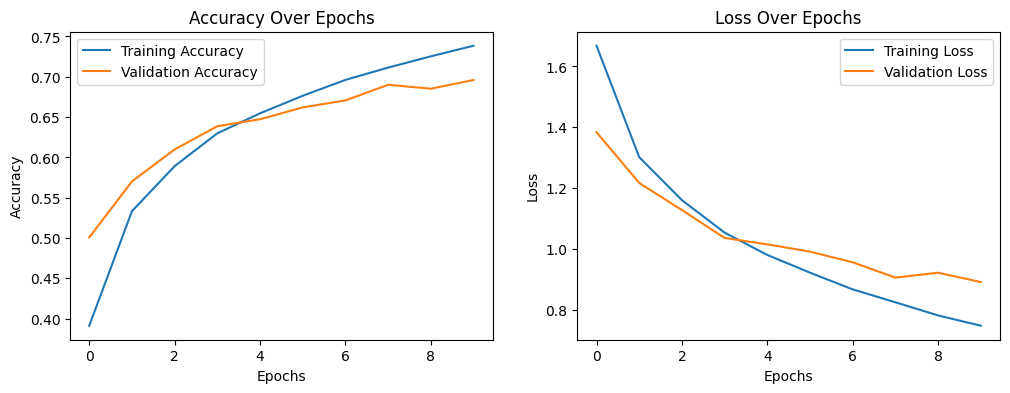

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


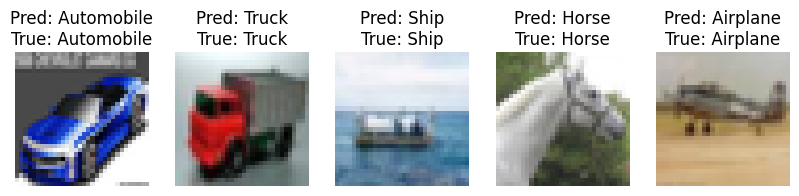

In [193]:
if __name__ == "__main__":
    train_images, train_labels, test_images, test_labels = load_data()

    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    cnn_model = create_cnn_model()
    history = train_model(cnn_model, train_images, train_labels)

    evaluate_model(cnn_model, test_images, test_labels)

    plot_training_history(history)

    predict_new_data(cnn_model, test_images, test_labels, class_names)